<a href="https://colab.research.google.com/github/shahd1995913/OCR-for-Chemistry/blob/main/Final_secound_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
import shutil

# Path to the directory containing your images
image_dir = '/content/gdrive/MyDrive/compounds_final'

# Base directory where subfolders will be created
base_directory = '/content/gdrive/MyDrive/img'

# Create the base directory if it doesn't exist
if not os.path.exists(base_directory):
    os.makedirs(base_directory)

# List all image files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]

# Iterate through image files and organize them
for image_file in image_files:
    # Extract the image name (excluding the file extension)
    image_name = os.path.splitext(image_file)[0]

    # Create a subfolder with the same name if it doesn't exist
    subfolder_path = os.path.join(base_directory, image_name)
    if not os.path.exists(subfolder_path):
        os.makedirs(subfolder_path)

    # Move the image to the subfolder
    source_path = os.path.join(image_dir, image_file)
    destination_path = os.path.join(subfolder_path, image_file)

    shutil.move(source_path, destination_path)

print("Images organized into subfolders based on their names.")

Images organized into subfolders based on their names.


In [4]:
import os
import shutil

# Path to the directory containing your images
base_directory = '/content/gdrive/MyDrive/img'

# List all subdirectories in the base directory
subdirectories = [d for d in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, d))]

# Iterate through subdirectories (image names)
for subdirectory in subdirectories:
    # Path to the subdirectory
    subdirectory_path = os.path.join(base_directory, subdirectory)

    # List all image files in the subdirectory
    image_files = [f for f in os.listdir(subdirectory_path) if f.endswith('.png')]

    # Duplicate each image 10 times
    for image_file in image_files:
        # Extract the image name (excluding the file extension)
        image_name, file_extension = os.path.splitext(image_file)

        # Duplicate the image 50 times
        for i in range(50):
            # Construct the new filename with an index
            new_image_name = f"{image_name}_{i + 1}{file_extension}"
            new_image_path = os.path.join(subdirectory_path, new_image_name)

            # Copy the image to the new filename
            source_path = os.path.join(subdirectory_path, image_file)
            shutil.copy(source_path, new_image_path)
print("Images duplicated 10 times and saved within their respective subfolders.")

Images duplicated 10 times and saved within their respective subfolders.


Total number of images in the train set: 6324
Total number of images in the test set: 1581
Number of unique classes: 155


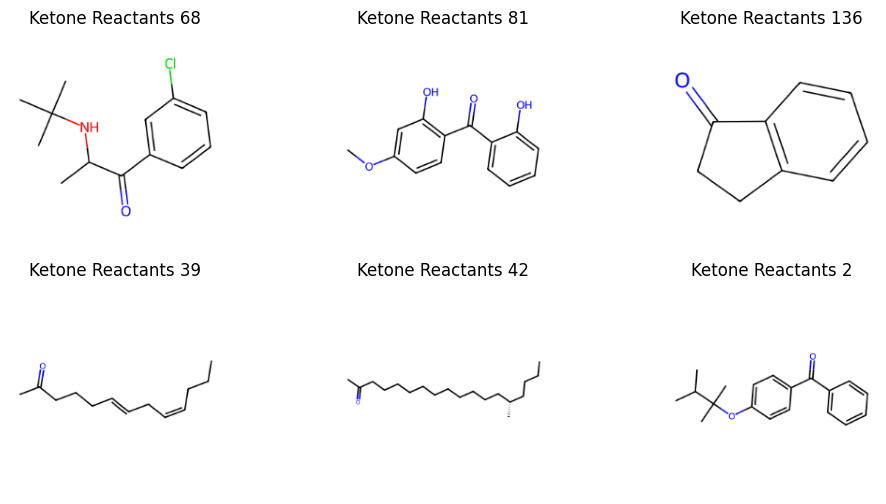

Epoch 1/10
198/198 [==============================] - 533s 3s/step - loss: 105.1575 - accuracy: 0.8713
Epoch 2/10
198/198 [==============================] - 546s 3s/step - loss: 0.0771 - accuracy: 0.9652
Epoch 3/10
198/198 [==============================] - 536s 3s/step - loss: 0.0958 - accuracy: 0.9662
Epoch 4/10
198/198 [==============================] - 534s 3s/step - loss: 0.0555 - accuracy: 0.9670
Epoch 5/10
198/198 [==============================] - 536s 3s/step - loss: 0.0549 - accuracy: 0.9681
Epoch 6/10
198/198 [==============================] - 538s 3s/step - loss: 0.0496 - accuracy: 0.9673
Epoch 7/10
198/198 [==============================] - 534s 3s/step - loss: 0.0499 - accuracy: 0.9655
Epoch 8/10
198/198 [==============================] - 536s 3s/step - loss: 0.0497 - accuracy: 0.9666
Epoch 9/10
198/198 [==============================] - 538s 3s/step - loss: 2.5976 - accuracy: 0.9625
Epoch 10/10
50/50 [==============================] - 40s 793ms/step - loss: 0.0835 - accu

In [10]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Function to add a white background to an image
def add_white_background(image):
    white_background = np.ones_like(image) * 255  # Create a white image
    white_background[:image.shape[0], :image.shape[1], :] = image  # Paste the original image
    return white_background

# Base directory containing subfolders of images
base_directory = '/content/gdrive/MyDrive/img'

X = []  # List to store images
y = []  # List to store labels (subfolder names)

# List all subdirectories (folders) within the base directory
subdirectories = [subdir for subdir in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, subdir))]

# Iterate through subdirectories (folders)
for subdir in subdirectories:
    subdirectory_path = os.path.join(base_directory, subdir)
    image_files = os.listdir(subdirectory_path)

    for file in image_files:
        # Load and preprocess images
        image = cv2.imread(os.path.join(subdirectory_path, file))
        image = cv2.resize(image, (224, 224))  # Adjust size as needed

        # Add a white background to the image
        image_with_white_background = add_white_background(image)

        X.append(image_with_white_background)

        # Use the subfolder name as the label
        y.append(subdir)

X = np.array(X)

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate the number of unique classes (number of folders)
num_classes = len(np.unique(y))

# Print the total number of images and unique classes
print(f"Total number of images in the train set: {len(X_train)}")
print(f"Total number of images in the test set: {len(X_test)}")
print(f"Number of unique classes: {num_classes}")

# Plot some of the images
plt.figure(figsize=(12, 6))
for i in range(6):  # Plot the first 6 images
    plt.subplot(2, 3, i + 1)
    plt.imshow(X_train[i])
    plt.title(y_train[i])
    plt.axis('off')

plt.show()

# Continue with the model architecture, training, and evaluation

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

from sklearn.preprocessing import LabelEncoder

# Convert class labels to integer labels using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training
model.fit(X_train, y_train_encoded, epochs=10)

# Testing and Evaluation
accuracy = model.evaluate(X_test, y_test_encoded)

# Print the accuracy
print("Test accuracy: {:.2f}%".format(accuracy[1] * 100))



In [17]:
# Modify your code to save the training history
history = model.fit(X_train, y_train_encoded, epochs=10, validation_data=(X_test, y_test_encoded))

# Evaluate the model
accuracy = model.evaluate(X_test, y_test_encoded)

# Print the accuracy
print("Test accuracy: {:.2f}%".format(accuracy[1] * 100))

# Plot the training history (loss and accuracy)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()


Epoch 1/10
 14/198 [=>............................] - ETA: 8:23 - loss: 0.0692 - accuracy: 0.9621

KeyboardInterrupt: ignored

50/50 [==============================] - 39s 765ms/step
Classification Report:
                       precision    recall  f1-score   support

  Ketone Reactants 1       1.00      1.00      1.00        11
 Ketone Reactants 10       1.00      1.00      1.00        13
Ketone Reactants 100       1.00      1.00      1.00        15
Ketone Reactants 101       1.00      1.00      1.00        10
Ketone Reactants 102       1.00      1.00      1.00        10
Ketone Reactants 103       1.00      1.00      1.00         8
Ketone Reactants 104       1.00      1.00      1.00         8
Ketone Reactants 105       1.00      1.00      1.00        11
Ketone Reactants 106       1.00      1.00      1.00        12
Ketone Reactants 107       0.00      0.00      0.00        14
Ketone Reactants 108       0.00      0.00      0.00         8
Ketone Reactants 109       1.00      1.00      1.00         9
 Ketone Reactants 11       1.00      1.00      1.00        12
Ketone Reactants 110       1.00      1.00      1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

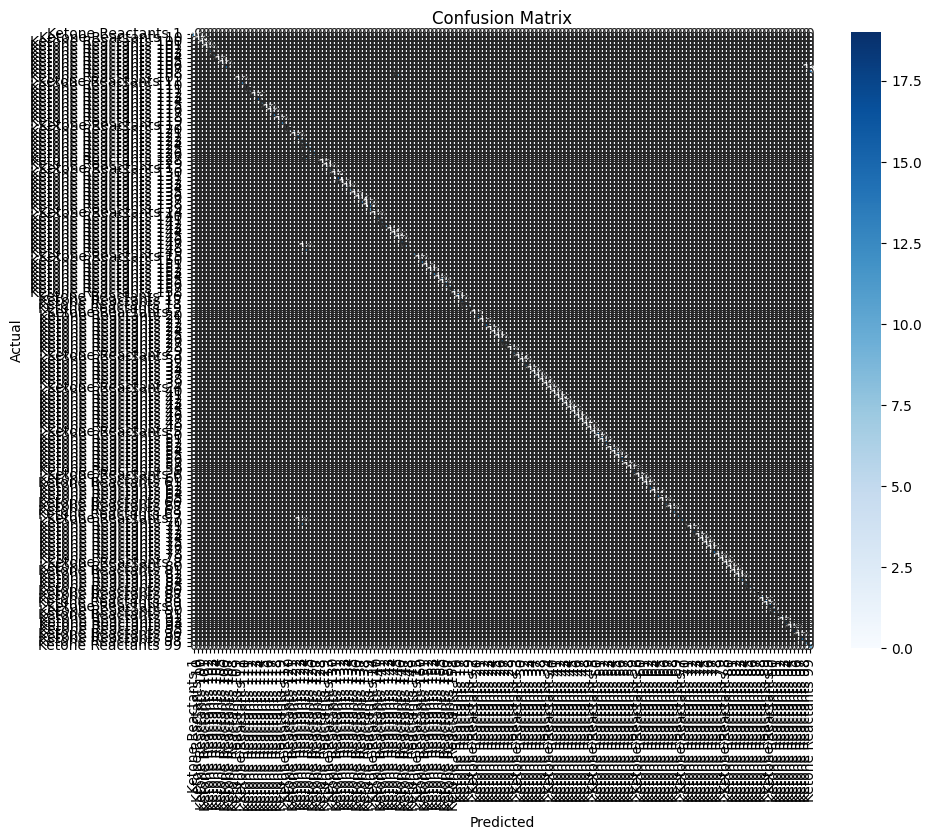

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns

# Predict class labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate and display a classification report
report = classification_report(y_test_encoded, y_pred_classes, target_names=label_encoder.classes_)
print("Classification Report:\n", report)

# Calculate and display a confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_classes)

# Calculate accuracy, F1-score, precision, and recall
accuracy = accuracy_score(y_test_encoded, y_pred_classes)
f1 = f1_score(y_test_encoded, y_pred_classes, average='weighted')
precision = precision_score(y_test_encoded, y_pred_classes, average='weighted')
recall = recall_score(y_test_encoded, y_pred_classes, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Weighted F1 Score: {f1:.2f}')
print(f'Weighted Precision: {precision:.2f}')
print(f'Weighted Recall: {recall:.2f}')

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


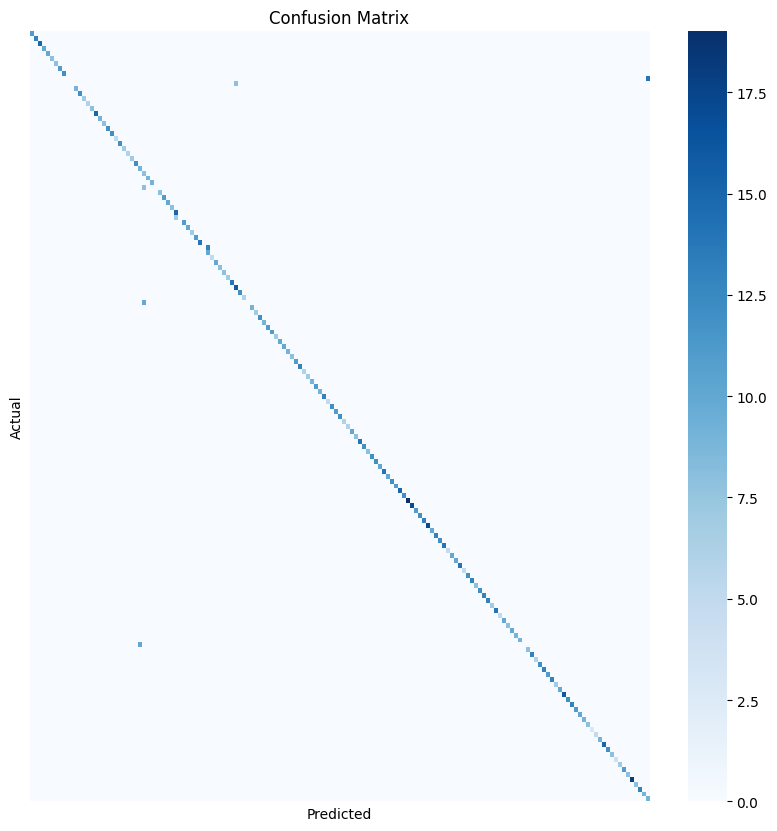

In [15]:
# # Plot the confusion matrix without labels
# plt.figure(figsize=(10, 8))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()


# Plot the confusion matrix without labels
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=False, xticklabels=False, yticklabels=False, cmap='Blues' , fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()